<a href="https://colab.research.google.com/github/muhsufyan/tamam/blob/main/model_tamam_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /content/dataset

In [4]:
!unzip /content/drive/MyDrive/ai/dataset/tamam-dataset.zip -d /content/dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8843_label_14.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8844_label_14.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8845_label_14.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8846_label_14.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8847_label_14.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8848_label_14.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8849_label_15.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8850_label_15.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8851_label_15.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8852_label_15.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8853_label_15.png  
  inflating: /content/dataset/tamam/4_Ekor_yg_diluruskan/id_8

In [1]:
# manggil library
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [5]:
# memberi label 
data_dir='/content/dataset/tamam'

categories = ['Huruf yang tidak dapat dirangkai ke depan', 'Titik yang membentuk lima bunyi huruf', 'Ekor yang dipotong', 'Ekor yg diluruskan', 'Dirangkai tanpa perubahan', 'Ekor yang diluruskan dan segitiga di tengah', 'Merangkai huruf fa qaf', 'Huruf kaf lam', 'Huruf mim ha']
fildet_cat = ['1_Enam_Huruf_yang_Tidak_Dapat_Dirangkai_ke_Depan','2_Titik_yang_Membentuk_Lima_Bunyi_Huruf','3_Ekor_yang_dipotong','4_Ekor_yg_diluruskan','5_Dirangkai_tanpa_perubahan','6_Ekor_yang_Diluruskan_dan_Segitiga_di_Tengah','7_Merangkai_huruf_fa_qaf','8_Huruf_kaf_lam','9_Huruf_mim_ha']
data = []

In [6]:
# inisialisasi data dan memberi label pada setiap data
def make_data ():
    for category in fildet_cat:
        path  = os.path.join(data_dir, category)
        label = fildet_cat.index(category)
        print(path)
        for img_name in os.listdir(path):
          image_path=os.path.join(path, img_name)
          image=cv2.imread(image_path)
          try:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (28,28))
            image = np.array (image, dtype=np.float32)
            data.append([image, label])
          except Exception as e:
            pass
    print(len(data))
    pik=open('data.pickle', 'wb') #save data yang sudah diberi label 
    pickle.dump(data, pik)
    pik.close()
    """with open('data.pickle', 'wb') as pik:#save data yang sudah diberi label 
      pickle.dump(data, pik) 
      pik.close()"""
    """
# Store data (serialize)
with open('filename.pickle', 'wb') as handle:
    pickle.dump(your_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load data (deserialize)
with open('filename.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    """


    #       cv2.imshow('image sdsdsfsfsd', image)
    #       break
    #     break
    #   cv2.waitKey(0)
    #   cv2.destroyAllWindows()
make_data()

/content/dataset/tamam/1_Enam_Huruf_yang_Tidak_Dapat_Dirangkai_ke_Depan
/content/dataset/tamam/2_Titik_yang_Membentuk_Lima_Bunyi_Huruf
/content/dataset/tamam/3_Ekor_yang_dipotong
/content/dataset/tamam/4_Ekor_yg_diluruskan
/content/dataset/tamam/5_Dirangkai_tanpa_perubahan
/content/dataset/tamam/6_Ekor_yang_Diluruskan_dan_Segitiga_di_Tengah
/content/dataset/tamam/7_Merangkai_huruf_fa_qaf
/content/dataset/tamam/8_Huruf_kaf_lam
/content/dataset/tamam/9_Huruf_mim_ha
13440


In [7]:
# fungsi load data dari pickle
def load_data():
    pick = open ('data.pickle', 'rb')
    data = pickle.load(pick)
    pick.close()
    
    np.random.shuffle(data)
    
    feature = []
    labels = []
    
    for img, label in data:
        feature.append(img)
        labels.append(label)
    
    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)
    
    feature = feature/255.0
    
    return [feature, labels]

In [8]:
# load data
(feature, labels) = load_data()

In [9]:
# memisahkan dataset
# melakukan pengujian dengan parameter dengan train dataset yang berbeda
x_train, x_test, y_train, y_test= train_test_split(feature, labels, test_size = 0.1)

In [10]:
input_layer = tf.keras.layers.Input([28,28,3])

conv1=tf.keras.layers.Conv2D(filters = 32, kernel_size=(5,5), padding='Same',
                      activation='relu')(input_layer)

pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = tf.keras.layers.Conv2D(filters= 64, kernel_size=(3,3), padding='Same',
                              activation='relu')(pool1)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv2)

conv3 = tf.keras.layers.Conv2D(filters= 96, kernel_size=(3,3), padding='Same',
                              activation='relu')(pool2)

pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv3)

conv4 = tf.keras.layers.Conv2D(filters= 96, kernel_size=(3,3), padding='Same',
                              activation='relu')(pool3)

pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv4)

flt1 = tf.keras.layers.Flatten()(pool4)
dn1 = tf.keras.layers.Dense(512, activation='relu')(flt1)
out = tf.keras.layers.Dense(9, activation='softmax')(dn1)

model = tf.keras.Model(input_layer, out)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# tain model
model_history = model.fit(x_train, y_train, batch_size = 100, epochs = 10)
validation_data = (x_test,y_test)
# save model
# model.save('mymodel.h5')

Epoch 1/10
121/121 [==============================] - 25s 196ms/step - loss: 1.0072 - accuracy: 0.6408
Epoch 2/10
121/121 [==============================] - 24s 194ms/step - loss: 0.3864 - accuracy: 0.8667
Epoch 3/10
121/121 [==============================] - 23s 194ms/step - loss: 0.2419 - accuracy: 0.9189
Epoch 4/10
121/121 [==============================] - 24s 196ms/step - loss: 0.1828 - accuracy: 0.9376
Epoch 5/10
121/121 [==============================] - 24s 196ms/step - loss: 0.1376 - accuracy: 0.9509
Epoch 6/10
121/121 [==============================] - 23s 194ms/step - loss: 0.1128 - accuracy: 0.9591
Epoch 7/10
121/121 [==============================] - 24s 199ms/step - loss: 0.0949 - accuracy: 0.9668
Epoch 8/10
121/121 [==============================] - 23s 194ms/step - loss: 0.0704 - accuracy: 0.9748
Epoch 9/10
121/121 [==============================] - 24s 197ms/step - loss: 0.0590 - accuracy: 0.9792
Epoch 10/10
121/121 [==============================] - 23s 194ms/step - l

CNN Accuracy: 0.9456845238095238


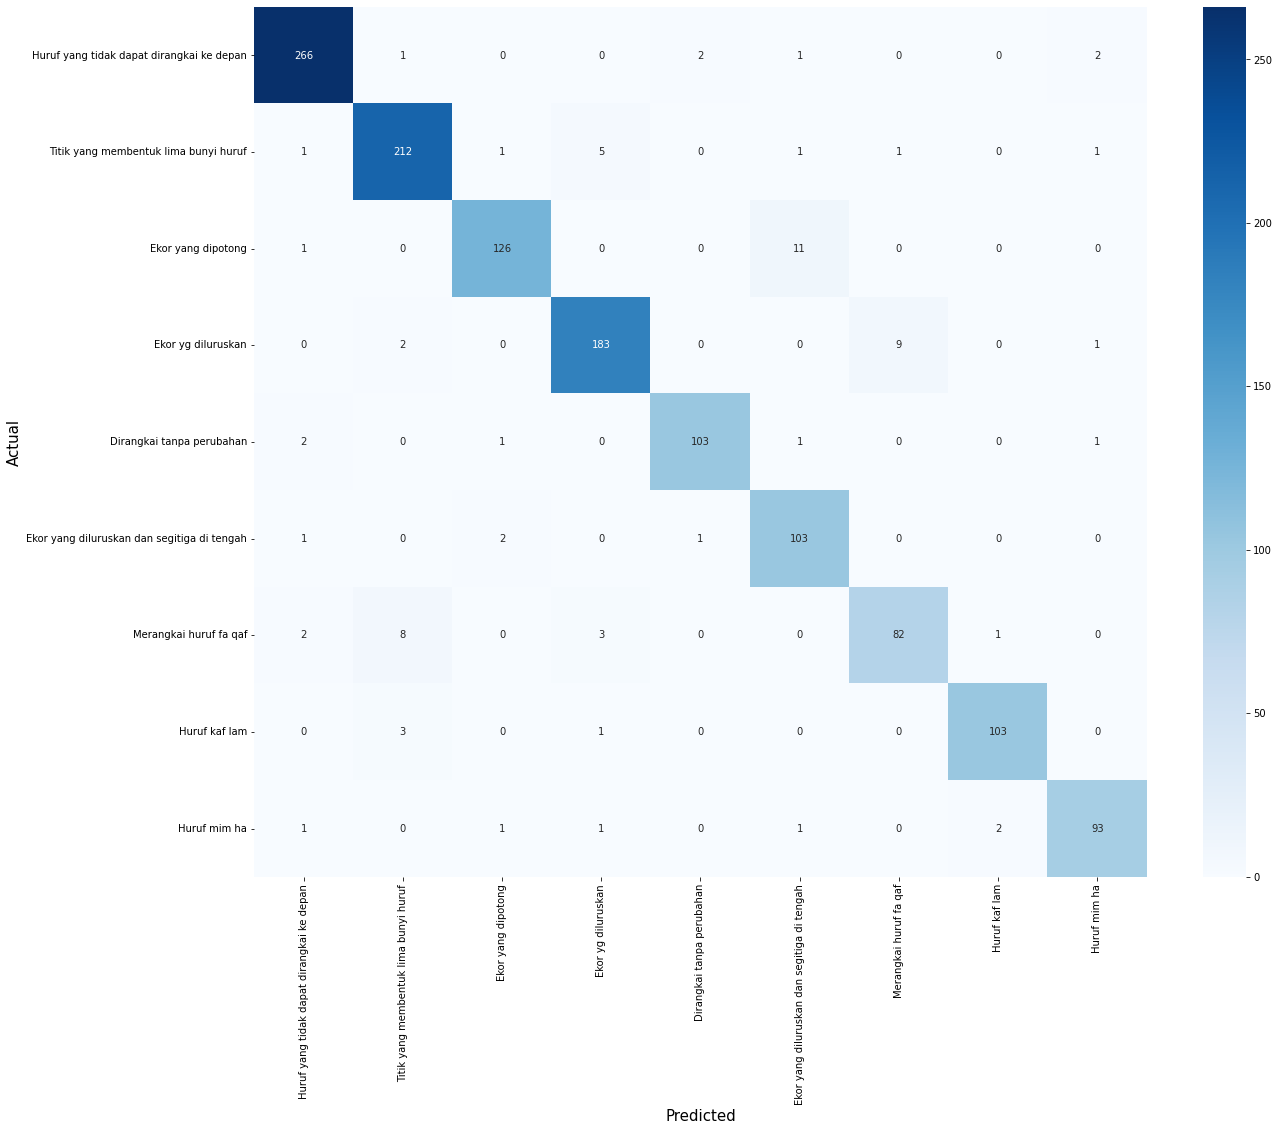

In [12]:
# menghitung accuracy menggunakan confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
ypred = model.predict(x_test)
cnn_accuracy = accuracy_score(y_test, ypred.argmax(axis=-1))
print("CNN Accuracy:",cnn_accuracy)
cnn_cn = confusion_matrix(y_test,ypred.argmax(axis=-1))
plt.subplots(figsize=(20,16))
sns.heatmap(cnn_cn,annot=True,fmt="1d",cmap="Blues",cbar=True,xticklabels=categories,yticklabels=categories)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
# plt.savefig('model60_e40.png')
plt.show()

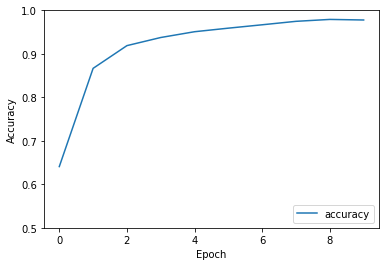

In [13]:
plt.plot(model_history.history['accuracy'], label='accuracy')
# plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(x_test, verbose=2)

In [14]:
# save model
model.save('model90_e10.h5')

In [15]:
cnn_accuracy

0.9456845238095238

In [16]:
# Deteksi
ypred = model.predict(x_test)

In [17]:
y_test

array([2, 0, 0, ..., 5, 6, 1])

In [18]:
ypred[0]

array([2.9469462e-08, 7.7575670e-08, 9.9979132e-01, 6.6463102e-10,
       3.8302323e-11, 2.0860463e-04, 5.5767505e-11, 1.0791201e-08,
       4.1149082e-08], dtype=float32)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred.argmax(axis=-1),target_names= categories))

                                             precision    recall  f1-score   support

  Huruf yang tidak dapat dirangkai ke depan       0.97      0.98      0.97       272
      Titik yang membentuk lima bunyi huruf       0.94      0.95      0.95       222
                         Ekor yang dipotong       0.96      0.91      0.94       138
                         Ekor yg diluruskan       0.95      0.94      0.94       195
                  Dirangkai tanpa perubahan       0.97      0.95      0.96       108
Ekor yang diluruskan dan segitiga di tengah       0.87      0.96      0.92       107
                     Merangkai huruf fa qaf       0.89      0.85      0.87        96
                              Huruf kaf lam       0.97      0.96      0.97       107
                               Huruf mim ha       0.95      0.94      0.94        99

                                   accuracy                           0.95      1344
                                  macro avg       0.94      0.9

In [20]:
model_load = tf.keras.models.load_model('model90_e10.h5')
print('loaded')

loaded


##test

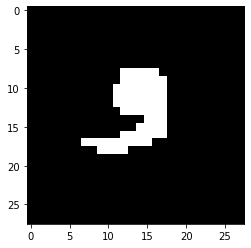

In [77]:
path = "/content/dataset/tamam/1_Enam_Huruf_yang_Tidak_Dapat_Dirangkai_ke_Depan/id_10066_label_27.png"
img = image.load_img(path, target_size=(28,28))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

In [78]:
print(classes)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [101]:
max_value = max(classes[0])
m = classes[0].index(max_value)
if m==0:
  print("Kelas : Huruf yang tidak dapat dirangkai ke depan")
elif m==1:
  print("Kelas : Titik yang membentuk lima bunyi huruf")
elif m==2:
  print("Kelas : Ekor yang dipotong")
elif m==3:
  print("Kelas : Ekor yg diluruskan")
elif m==4:
  print("Kelas : Dirangkai tanpa perubahan")
elif m==5:
  print("Kelas : Ekor yang diluruskan dan segitiga di tengah")
elif m==6:
  print("Kelas : Merangkai huruf fa qaf")     
elif m==7:
  print("Kelas : Huruf kaf lam")
elif m==8:
  print("Kelas : Huruf mim ha")
else:
  print("Kelas : tidak terdeteksi")

Kelas : Ekor yg diluruskan
